In [52]:
import pandas as pd

In [53]:
automobile_data = pd.read_csv('datasets/auto.csv', sep=r'\s*,\s*',engine='python')

In [54]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [55]:
import numpy as np

In [56]:
automobile_data = automobile_data.replace('?',np.nan)
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [57]:
automobile_data = automobile_data.dropna()

In [58]:
automobile_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [59]:
col = ['make', 'fuel-type', 'body-style', 'horsepower']
automobile_features = automobile_data[col]

In [60]:
automobile_features.head()

,make,fuel-type,body-style,horsepower
3,audi,gas,sedan,102
4,audi,gas,sedan,115
6,audi,gas,sedan,110
8,audi,gas,sedan,140
10,bmw,gas,sedan,101


In [61]:
automobile_target = automobile_data[['price']]

In [62]:
automobile_target.head()

,price
3,13950
4,17450
6,17710
8,23875
10,16430


In [63]:
pd.options.mode.chained_assignment = None

In [64]:
automobile_features['horsepower'] = \
                    pd.to_numeric(automobile_features['horsepower'])

In [65]:
automobile_features['horsepower'].describe()

count    159.000000
mean      95.836478
std       30.718583
min       48.000000
25%       69.000000
50%       88.000000
75%      114.000000
max      200.000000
Name: horsepower, dtype: float64

In [66]:
automobile_target = automobile_target.astype(float)

In [67]:
automobile_target['price'].describe()

count      159.000000
mean     11445.729560
std       5877.856195
min       5118.000000
25%       7372.000000
50%       9233.000000
75%      14719.500000
max      35056.000000
Name: price, dtype: float64

In [68]:
automobile_features = pd.get_dummies(automobile_features,
                                    columns=['make','fuel-type','body-style'])

In [69]:
 automobile_features.head()

,horsepower,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_jaguar,make_mazda,make_mercedes-benz,make_mitsubishi,...,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon
3,102,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,115,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,110,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
8,140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
10,101,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [70]:
from sklearn import preprocessing

In [71]:
automobile_features[['horsepower']] = \
                    preprocessing.scale(automobile_features[['horsepower']])

In [72]:
automobile_features[['horsepower']].head()

,horsepower
3,0.201279
4,0.625812
6,0.462530
8,1.442223
10,0.168622


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(automobile_features,
                                                   automobile_target,
                                                   test_size=0.2,
                                                   random_state=0)

In [75]:
import torch

In [76]:
dtype = torch.float

In [77]:
x_train_tensor = torch.tensor(x_train.values, dtype=dtype)
x_test_tensor = torch.tensor(x_test.values, dtype=dtype)

y_train_tensor = torch.tensor(y_train.values, dtype=dtype)
y_test_tensor = torch.tensor(y_test.values, dtype=dtype)

In [78]:
x_train_tensor.shape

torch.Size([127, 26])

In [79]:
y_train_tensor.shape

torch.Size([127, 1])

In [81]:
inp = 26
out = 1

hid = 100
loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001

In [82]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                           torch.nn.Sigmoid(),
                           torch.nn.Linear(hid,out),)

In [83]:
for iter in range(10000):
    y_pred = model(x_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    
    if iter%1000 == 0:
        print(iter, loss.item())
        
    model.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 168086080.0
1000 4333640.5
2000 2405939.75
3000 1693779.25
4000 1413564.375
5000 1271367.25
6000 1196490.0
7000 1108785.25
8000 1031555.8125
9000 990856.125


In [84]:
sample = x_test.iloc[23]
sample

horsepower               -0.353881
make_audi                 0.000000
make_bmw                  0.000000
make_chevrolet            0.000000
make_dodge                0.000000
make_honda                0.000000
make_jaguar               0.000000
make_mazda                0.000000
make_mercedes-benz        0.000000
make_mitsubishi           0.000000
make_nissan               0.000000
make_peugot               0.000000
make_plymouth             0.000000
make_porsche              0.000000
make_saab                 0.000000
make_subaru               0.000000
make_toyota               0.000000
make_volkswagen           1.000000
make_volvo                0.000000
fuel-type_diesel          0.000000
fuel-type_gas             1.000000
body-style_convertible    0.000000
body-style_hardtop        0.000000
body-style_hatchback      0.000000
body-style_sedan          1.000000
body-style_wagon          0.000000
Name: 186, dtype: float64

In [85]:
sample_tensor = torch.tensor(sample.values, dtype=dtype)
sample_tensor

tensor([-0.3539,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,
         1.0000,  0.0000])

In [87]:
y_pred = model(sample_tensor)
print("Predicted price - ",int(y_pred.item()))
print("Actual Price - ",int(y_test.iloc[23]))

Predicted price -  8089
Actual Price -  8495


In [88]:
y_pred_tensor = model(x_test_tensor)

In [89]:
y_pred = y_pred_tensor.detach().numpy()

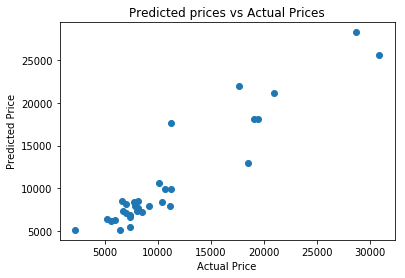

In [90]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, y_test.values)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.title("Predicted prices vs Actual Prices")
plt.show()

In [96]:
torch.save(model, "my_model_1")

In [97]:
saved_model = torch.load("my_model_1")

In [98]:
y_pred_tensor = saved_model(x_test_tensor)

In [99]:
y_pred = y_pred_tensor.detach().numpy()

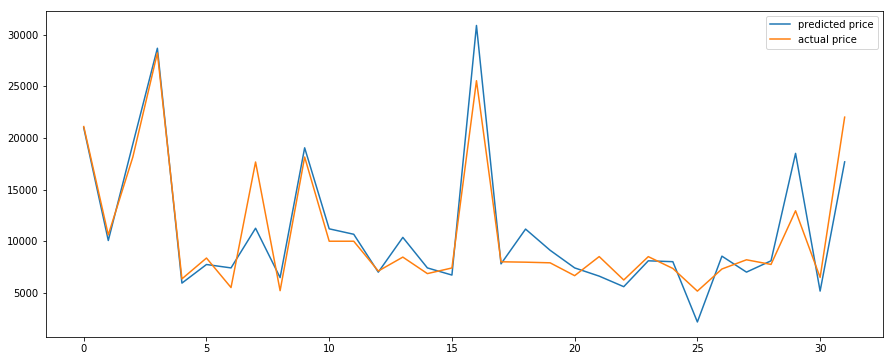

In [100]:
plt.figure(figsize=(15,6))

plt.plot(y_pred, label="predicted price")
plt.plot(y_test.values, label="actual price")

plt.legend()
plt.show()